In [1]:
import pandas as pd
import requests
import re

# Wet Race Weekends

In [2]:
wet_races_id = []
wet_races_names = []
wet_races_year = []

#Import races.csv
races = pd.read_csv('f1db_csv/races.csv')

races

,raceId,year,round,circuitId,name,date,time,url,fp1_date,fp1_time,fp2_date,fp2_time,fp3_date,fp3_time,quali_date,quali_time,sprint_date,sprint_time
0,1,2009,1,1,Australian Grand Prix,2009-03-29,06:00:00,http://en.wikipedia.org/wiki/2009_Australian_G...,\N,\N,\N,\N,\N,\N,\N,\N,\N,\N
1,2,2009,2,2,Malaysian Grand Prix,2009-04-05,09:00:00,http://en.wikipedia.org/wiki/2009_Malaysian_Gr...,\N,\N,\N,\N,\N,\N,\N,\N,\N,\N
2,3,2009,3,17,Chinese Grand Prix,2009-04-19,07:00:00,http://en.wikipedia.org/wiki/2009_Chinese_Gran...,\N,\N,\N,\N,\N,\N,\N,\N,\N,\N
3,4,2009,4,3,Bahrain Grand Prix,2009-04-26,12:00:00,http://en.wikipedia.org/wiki/2009_Bahrain_Gran...,\N,\N,\N,\N,\N,\N,\N,\N,\N,\N
4,5,2009,5,4,Spanish Grand Prix,2009-05-10,12:00:00,http://en.wikipedia.org/wiki/2009_Spanish_Gran...,\N,\N,\N,\N,\N,\N,\N,\N,\N,\N
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1074,1092,2022,18,22,Japanese Grand Prix,2022-10-09,05:00:00,http://en.wikipedia.org/wiki/2022_Japanese_Gra...,2022-10-07,03:00:00,2022-10-07,06:00:00,2022-10-08,03:00:00,2022-10-08,06:00:00,\N,\N
1075,1093,2022,19,69,United States Grand Prix,2022-10-23,19:00:00,http://en.wikipedia.org/wiki/2022_United_State...,2022-10-21,19:00:00,2022-10-21,22:00:00,2022-10-22,19:00:00,2022-10-22,22:00:00,\N,\N
1076,1094,2022,20,32,Mexico City Grand Prix,2022-10-30,20:00:00,http://en.wikipedia.org/wiki/2022_Mexican_Gran...,2022-10-28,18:00:00,2022-10-28,21:00:00,2022-10-29,17:00:00,2022-10-29,20:00:00,\N,\N
1077,1095,2022,21,18,Brazilian Grand Prix,2022-11-13,18:00:00,http://en.wikipedia.org/wiki/2022_Brazilian_Gr...,2022-11-11,15:30:00,2022-11-12,15:30:00,\N,\N,2022-11-11,19:00:00,2022-11-12,19:30:00


In [3]:
#Iterate through each row in the dataframe
for index, row in races.iterrows():
    wiki = requests.get(races.iloc[index]['url']).text
    count = len(re.findall(' wet | rain ', wiki))

    if count >= 1:
        wet_races_id.append(races.iloc[index]['raceId'])
        wet_races_names.append(races.iloc[index]['name'])
        wet_races_year.append(races.iloc[index]['year'])

In [4]:
#Create dataframe from list of names and years
wet_df = pd.DataFrame({'year': wet_races_year, 'name': wet_races_names, 'race_id': wet_races_id})

wet_df

,year,name,race_id
0,2009,Malaysian Grand Prix,2
1,2009,Chinese Grand Prix,3
2,2009,German Grand Prix,9
3,2009,Belgian Grand Prix,12
4,2009,Japanese Grand Prix,15
...,...,...,...
252,2022,Singapore Grand Prix,1091
253,2022,Japanese Grand Prix,1092
254,2022,Mexico City Grand Prix,1094
255,2022,Brazilian Grand Prix,1095


In [5]:
#Export dataframe to csv
wet_df.to_csv('Exported Dataframes/wet_races.csv')

### Wet races as a percentage of whole

In [7]:
wet_races_percentage = pd.DataFrame({'year': range(1950, 2023), 'percentage': (wet_df.groupby(['year']).count()['name'] / races.groupby(['year']).count()['name'] * 100)})
wet_races_percentage.reset_index(drop=True)

,year,percentage
0,1950,14.285714
1,1951,NaN
2,1952,12.500000
3,1953,NaN
4,1954,11.111111
...,...,...
68,2018,14.285714
69,2019,14.285714
70,2020,29.411765
71,2021,36.363636


In [8]:
#Export dataframe to csv
wet_races_percentage.to_csv('Exported Dataframes/yearly_percentage_wet.csv')

# Races Cut Short

In [9]:
short_races_id = []
short_races_names = []
short_races_year = []
short_races_reason = []

In [10]:
#Iterate through each row in the dataframe
for index, row in races.iterrows():
    wiki = requests.get(races.iloc[index]['url']).text
    count = len(re.findall('Scheduled distance', wiki))
    rain_count = len(re.findall(' wet | rain ', wiki))

    if count >= 1:
        short_races_id.append(races.iloc[index]['raceId'])
        short_races_names.append(races.iloc[index]['name'])
        short_races_year.append(races.iloc[index]['year'])

        if rain_count >= 1:
            short_races_reason.append('Rain')
        elif rain_count == 0:
            short_races_reason.append('Not Rain')

In [11]:
#Create dataframe from list of names and years
short_df = pd.DataFrame({'year': short_races_year, 'name': short_races_names, 'race_id': short_races_id, 'reason for cancel': short_races_reason})

short_df

,year,name,race_id,reason for cancel
0,2009,Malaysian Grand Prix,2,Rain
1,2008,Monaco Grand Prix,23,Rain
2,2007,Spanish Grand Prix,39,Rain
3,2007,British Grand Prix,44,Not Rain
4,2006,Australian Grand Prix,55,Not Rain
...,...,...,...,...
67,2021,Belgian Grand Prix,1063,Rain
68,2022,Monaco Grand Prix,1080,Rain
69,2022,Singapore Grand Prix,1091,Rain
70,2022,Japanese Grand Prix,1092,Rain


In [12]:
#Export dataframe to csv
short_df.to_csv('Exported Dataframes/short_races.csv')

# Weather Descriptions per Race

In [13]:
weather_races_id = []
weather_races_names = []
weather_races_year = []
weather_description = []

In [14]:
for index, row in races.iterrows():
    wiki = requests.get(races.iloc[index]['url']).text
    description = re.findall('Weather</th><td colspan="3" class="infobox-data">\n?(.*?)</td>', wiki)

    if len(description) >= 1:
        weather_races_id.append(races.iloc[index]['raceId'])
        weather_races_names.append(races.iloc[index]['name'])
        weather_races_year.append(races.iloc[index]['year'])
        weather_description.append(description)

In [22]:
weather_df = pd.DataFrame({'year': weather_races_year, 'name': weather_races_names, 'race_id': weather_races_id, 'weather description': weather_description}).sort_values(by=['year'])

weather_df

,year,name,race_id,weather description
744,1950,Italian Grand Prix,839,"[Warm, hot and sunny]"
743,1950,French Grand Prix,838,[Hot and sunny]
742,1950,Belgian Grand Prix,837,"[Warm, dry and sunny]"
741,1950,Swiss Grand Prix,836,"[Warm, dry and sunny]"
740,1950,Indianapolis 500,835,[Rainy]
...,...,...,...,...
913,2022,Australian Grand Prix,1076,[Partly cloudy]
912,2022,Saudi Arabian Grand Prix,1075,[Clear]
890,2022,Bahrain Grand Prix,1074,[Clear]
919,2022,Canadian Grand Prix,1082,[Sunny]


<AxesSubplot:xlabel='year'>

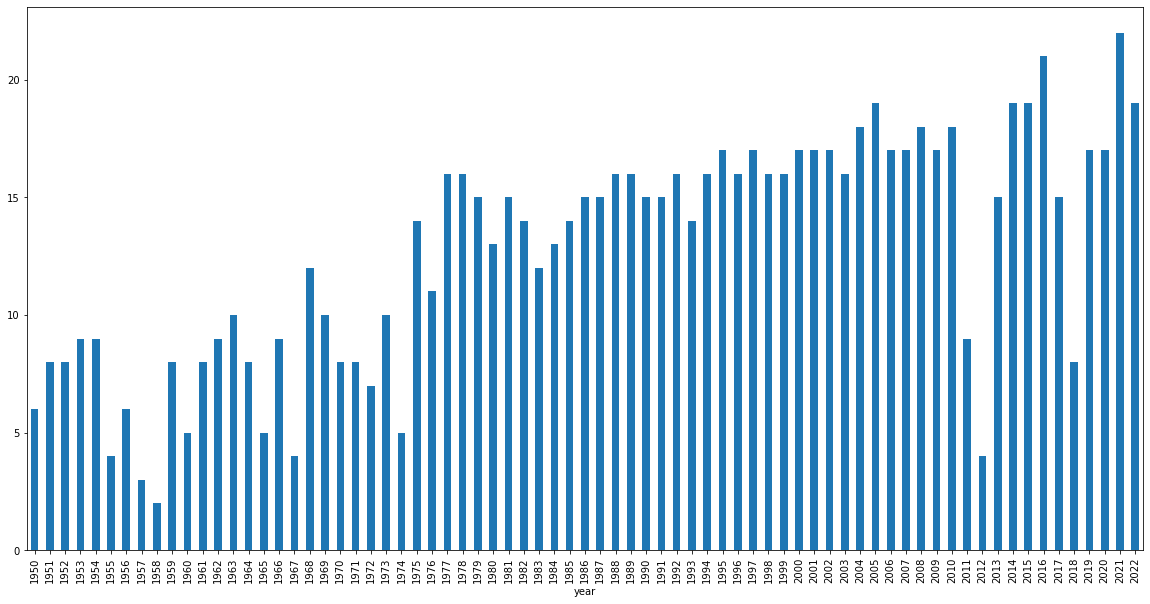

In [24]:
weather_df['year'].groupby(weather_df['year']).count().plot(kind='bar', figsize=(20, 10))

In [23]:
#Export dataframe to csv
weather_df.to_csv('Exported Dataframes/weather_description.csv')